In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
import cufflinks as cf
# from plotly.figure_factory._county_choropleth import create_choropleth
from matplotlib import rcParams



In [41]:
cwd = pd.read_csv('F:/PyCharm/Data Visualization/Michigan CWD/Number_of_CWD-positive_deer_identified_per_township__2015-2019_.csv')

cwd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID_12   36 non-null     int64  
 1   TR            36 non-null     object 
 2   CNTY_NUM      36 non-null     int64  
 3   TIER          36 non-null     object 
 4   RANGE         36 non-null     object 
 5   CNTY_NAME     36 non-null     object 
 6   Tests2015     18 non-null     float64
 7   Test2016      23 non-null     float64
 8   Test2017      36 non-null     int64  
 9   Test2018      36 non-null     int64  
 10  Test2019      36 non-null     int64  
 11  TestTotal     36 non-null     int64  
 12  Pos2015       3 non-null      float64
 13  Pos2016       3 non-null      float64
 14  Pos2017       12 non-null     float64
 15  Pos2018       23 non-null     float64
 16  Pos2019       22 non-null     float64
 17  PosTotal      36 non-null     int64  
 18  SHAPE_Length  36 non-null     fl

In [42]:
cwd.head()


,OBJECTID_12,TR,CNTY_NUM,TIER,RANGE,CNTY_NAME,Tests2015,Test2016,Test2017,Test2018,Test2019,TestTotal,Pos2015,Pos2016,Pos2017,Pos2018,Pos2019,PosTotal,SHAPE_Length,SHAPE_Area
0,428,"T12N,R08W",59,12N,08W,MONTCALM,NaN,NaN,570,258,125,953,NaN,NaN,2.0,1.0,NaN,3,0.412128,0.010365
1,430,"T12N,R09W",59,12N,09W,MONTCALM,NaN,NaN,355,182,78,615,NaN,NaN,2.0,1.0,NaN,3,0.412932,0.010418
2,431,"T12N,R10W",59,12N,10W,MONTCALM,NaN,NaN,172,67,29,268,NaN,NaN,2.0,NaN,NaN,2,0.413624,0.010399
3,432,"T11N,R05W",59,11N,05W,MONTCALM,2.0,6.0,91,347,159,605,NaN,NaN,1.0,NaN,NaN,1,0.412854,0.010369
4,433,"T11N,R06W",59,11N,06W,MONTCALM,NaN,1.0,77,237,132,447,NaN,NaN,NaN,5.0,5.0,10,0.412869,0.010384


In [43]:
cwd.describe()

,OBJECTID_12,CNTY_NUM,Tests2015,Test2016,Test2017,Test2018,Test2019,TestTotal,Pos2015,Pos2016,Pos2017,Pos2018,Pos2019,PosTotal,SHAPE_Length,SHAPE_Area
count,36.000000,36.000000,18.000000,23.000000,36.000000,36.000000,36.000000,36.000000,3.000000,3.000000,12.000000,23.000000,22.000000,36.000000,36.000000,36.000000
mean,740.194444,42.805556,56.444444,74.260870,149.805556,156.666667,100.388889,482.527778,1.666667,1.333333,3.750000,2.695652,2.954545,5.027778,0.411787,0.010348
std,276.446825,14.425809,172.263554,162.839636,160.176121,80.587840,46.037424,422.177585,1.154701,0.577350,2.864358,1.940824,2.681103,5.779205,0.003470,0.000160
min,428.000000,19.000000,1.000000,1.000000,1.000000,41.000000,29.000000,107.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.404119,0.010013
25%,438.500000,33.750000,1.000000,1.000000,13.500000,99.000000,69.500000,261.000000,1.000000,1.000000,1.750000,1.000000,1.000000,1.000000,0.409872,0.010254
50%,758.000000,41.000000,1.500000,6.000000,87.500000,143.500000,88.500000,339.000000,1.000000,1.000000,2.500000,2.000000,2.000000,2.000000,0.412630,0.010370
75%,912.000000,59.000000,6.250000,26.000000,257.750000,182.000000,126.500000,607.500000,2.000000,1.500000,5.500000,4.500000,3.000000,6.250000,0.413171,0.010417
max,1221.000000,59.000000,724.000000,648.000000,580.000000,382.000000,248.000000,2465.000000,3.000000,2.000000,9.000000,7.000000,10.000000,24.000000,0.419460,0.010711


In [44]:
cwd.columns


Index(['OBJECTID_12', 'TR', 'CNTY_NUM', 'TIER', 'RANGE', 'CNTY_NAME',
       'Tests2015', 'Test2016', 'Test2017', 'Test2018', 'Test2019',
       'TestTotal', 'Pos2015', 'Pos2016', 'Pos2017', 'Pos2018', 'Pos2019',
       'PosTotal', 'SHAPE_Length', 'SHAPE_Area'],
      dtype='object')

In [45]:
cwd.isna().sum()

OBJECTID_12      0
TR               0
CNTY_NUM         0
TIER             0
RANGE            0
CNTY_NAME        0
Tests2015       18
Test2016        13
Test2017         0
Test2018         0
Test2019         0
TestTotal        0
Pos2015         33
Pos2016         33
Pos2017         24
Pos2018         13
Pos2019         14
PosTotal         0
SHAPE_Length     0
SHAPE_Area       0
dtype: int64

In [46]:
data_clean = cwd

data_clean.replace('<null>', np.nan, inplace=True)

In [47]:
cwd1 = data_clean.groupby ('CNTY_NAME', as_index=False, sort=True)['TestTotal'].sum()
cwd1 = cwd1.sort_values('TestTotal', ascending=False)
cwd1.head()

,CNTY_NAME,TestTotal
8,MONTCALM,7513
0,CLINTON,2720
4,INGHAM,2465
7,KENT,1289
6,JACKSON,1157


Text(0.5, 1.0, 'Counties who tested for CWD the most.')

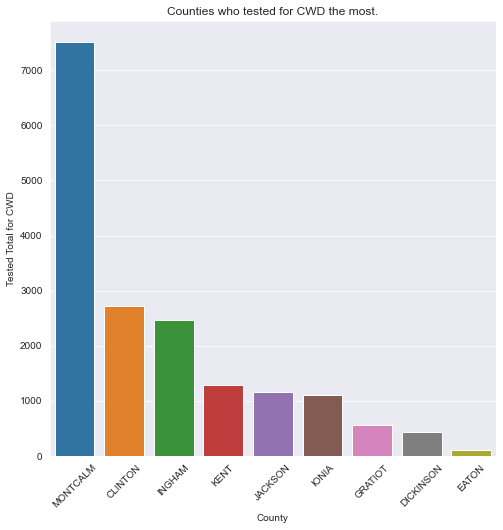

In [48]:
cwd1 = cwd1[:]
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')

p = sns.barplot(x='CNTY_NAME', y='TestTotal', data=cwd1)
p.set(xlabel='County', ylabel='Tested Total for CWD')
p.set_xticklabels(p.get_xticklabels(), rotation=45)
p.set_title("Counties who tested for CWD the most.")


In [49]:
cwd2 = data_clean.groupby('CNTY_NAME', as_index=False, sort=True)['PosTotal'].sum()
cwd2 = cwd2.sort_values('PosTotal', ascending=False)
cwd2.head()

,CNTY_NAME,PosTotal
8,MONTCALM,116
7,KENT,36
6,JACKSON,9
0,CLINTON,5
4,INGHAM,5


Text(0.5, 1.0, 'Counties with the most CWD Positive deer.')

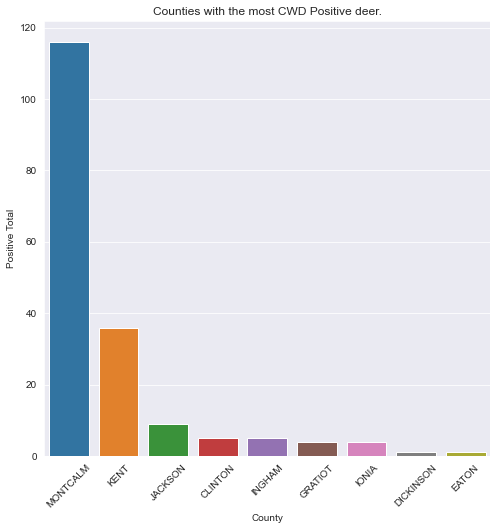

In [50]:
cwd2 = cwd2[:]
plt.figure(figsize=(8, 8))
sns.set_style('darkgrid')
p = sns.barplot(x='CNTY_NAME', y='PosTotal', data=cwd2)
p.set(xlabel='County', ylabel='Positive Total')
p.set_xticklabels(p.get_xticklabels(), rotation=45)
p.set_title("Counties with the most CWD Positive deer.")

In [51]:
cwd3 = data_clean.groupby('CNTY_NAME', as_index=False, sort=True).sum()
cwd3 = cwd3.sort_values('TestTotal', ascending=True)
cwd3.head()


,CNTY_NAME,OBJECTID_12,CNTY_NUM,Tests2015,Test2016,Test2017,Test2018,Test2019,TestTotal,Pos2015,Pos2016,Pos2017,Pos2018,Pos2019,PosTotal,SHAPE_Length,SHAPE_Area
2,EATON,1120,23,7.0,10.0,8,41,50,116,0.0,0.0,0.0,1.0,0.0,1,0.412996,0.010416
1,DICKINSON,1149,22,0.0,33.0,84,156,162,435,0.0,0.0,0.0,1.0,0.0,1,0.419460,0.010681
3,GRATIOT,3013,87,3.0,4.0,17,258,288,570,0.0,0.0,0.0,1.0,3.0,4,1.225052,0.030586
5,IONIA,3620,136,6.0,68.0,164,588,280,1106,0.0,0.0,0.0,2.0,2.0,4,1.647914,0.041354
6,JACKSON,3288,152,3.0,1.0,10,465,678,1157,0.0,0.0,0.0,2.0,7.0,9,1.625290,0.040457


<AxesSubplot:ylabel='CNTY_NAME'>

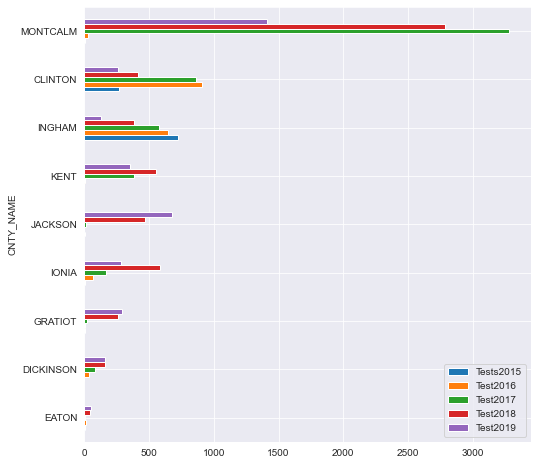

In [52]:
pd.DataFrame(cwd3, columns=['CNTY_NAME', 'Tests2015', 'Test2016', 'Test2017', 'Test2018', 'Test2019'])

cwd3.plot(x='CNTY_NAME', y=['Tests2015', 'Test2016', 'Test2017', 'Test2018', 'Test2019'], kind='barh', figsize=(8, 8))


In [53]:
cwd4 = data_clean.groupby('CNTY_NAME', as_index=False, sort=True).sum()
cwd4 = cwd4.sort_values('PosTotal' ,ascending=True)
cwd4.head()


,CNTY_NAME,OBJECTID_12,CNTY_NUM,Tests2015,Test2016,Test2017,Test2018,Test2019,TestTotal,Pos2015,Pos2016,Pos2017,Pos2018,Pos2019,PosTotal,SHAPE_Length,SHAPE_Area
1,DICKINSON,1149,22,0.0,33.0,84,156,162,435,0.0,0.0,0.0,1.0,0.0,1,0.419460,0.010681
2,EATON,1120,23,7.0,10.0,8,41,50,116,0.0,0.0,0.0,1.0,0.0,1,0.412996,0.010416
3,GRATIOT,3013,87,3.0,4.0,17,258,288,570,0.0,0.0,0.0,1.0,3.0,4,1.225052,0.030586
5,IONIA,3620,136,6.0,68.0,164,588,280,1106,0.0,0.0,0.0,2.0,2.0,4,1.647914,0.041354
0,CLINTON,3660,57,266.0,910.0,866,417,261,2720,2.0,2.0,0.0,1.0,0.0,5,1.227568,0.030693


<AxesSubplot:ylabel='CNTY_NAME'>

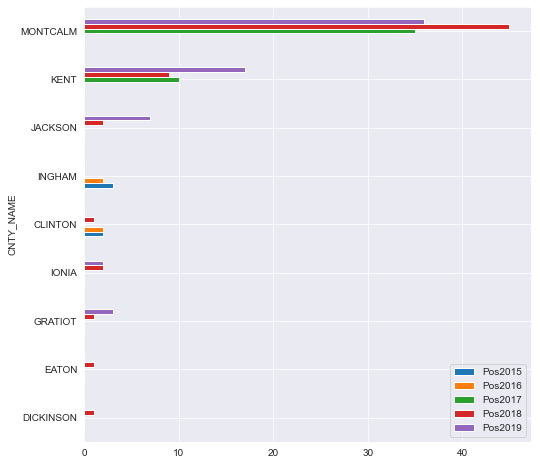

In [54]:
pd.DataFrame(cwd4, columns=['CNTY_NAME', 'Pos2015', 'Pos2016', 'Pos2017', 'Pos2018', 'Pos2019'])

cwd4.plot(x='CNTY_NAME', y=['Pos2015', 'Pos2016', 'Pos2017', 'Pos2018', 'Pos2019'], kind='barh', figsize=(8, 8))

In [55]:

data_clean.groupby('CNTY_NAME', as_index=False, sort=True).sum().to_csv('CNTY_NAME_GROUP.csv', index=False)
cwd5 = pd.read_csv('CNTY_NAME_GROUP.csv')
cwd5



cwd5.iplot(kind='barh', barmode='overlay', x='CNTY_NAME', y=['TestTotal', 'PosTotal'],
           title= 'Counties tested total amount, and positive results.')


In [56]:
cwd5.iplot(kind='bar', x='CNTY_NAME', y=['Tests2015', 'Test2016', 'Test2017', 'Test2018', 'Test2019'], theme='white',
           title= 'Counties tested amounts for CWD, 2015-2019.')

In [57]:

cwd5.iplot(kind='bar', x='CNTY_NAME', y=['Pos2015', 'Pos2016', 'Pos2017', 'Pos2018', 'Pos2019'], theme='white',
           title= 'CWD positive deer between 2015-2019')

In [58]:
m = folium.Map(location=[43.0978, -85.2289], zoom_start=8,
               tiles='https://server.arcgisonline.com/ArcGIS/rest/services/Specialty/DeLorme_World_Base_Map/MapServer/tile/{z}/{y}/{x}',
               attr='My Data Attribution'
               )


g = folium.GeoJson(open('geojson.json').read()).add_to(m)

folium.GeoJsonTooltip(fields=['CNTY_NAME', 'Tests2015', 'Test2016', 'Test2017', 'Test2018', 'Test2019', 'TestTotal',
                              'Pos2015', 'Pos2016', 'Pos2017', 'Pos2018', 'Pos2019', 'PosTotal']).add_to(g)

m

In [61]:
cwd6 = data_clean
Montcalm = cwd6[cwd6['CNTY_NAME'] == 'MONTCALM']
Kent = cwd6[cwd6['CNTY_NAME'] == 'KENT']
Jackson = cwd6[cwd6['CNTY_NAME'] == 'Jackson']
Ionia = cwd6[cwd6['CNTY_NAME'] == 'Ionia']
Ingham = cwd6[cwd6['CNTY_NAME'] == 'Ingham']
Gratiot = cwd6[cwd6['CNTY_NAME'] == 'GRATIOT']
Eaton = cwd6[cwd6['CNTY_NAME'] == 'EATON']
Dickinson = cwd6[cwd6['CNTY_NAME'] == 'DICKINSON']
Clinton = cwd6[cwd6['CNTY_NAME'] == 'CLINTON']

Montcalm = Montcalm.head(12)
Kent = Kent.head(12)
Jackson = Jackson.head(12)
Ionia = Ionia.head(12)
Gratiot = Gratiot.head(12)
Eaton = Eaton.head(12)
Dickinson = Dickinson.head(12)
Clinton = Clinton.head(12)

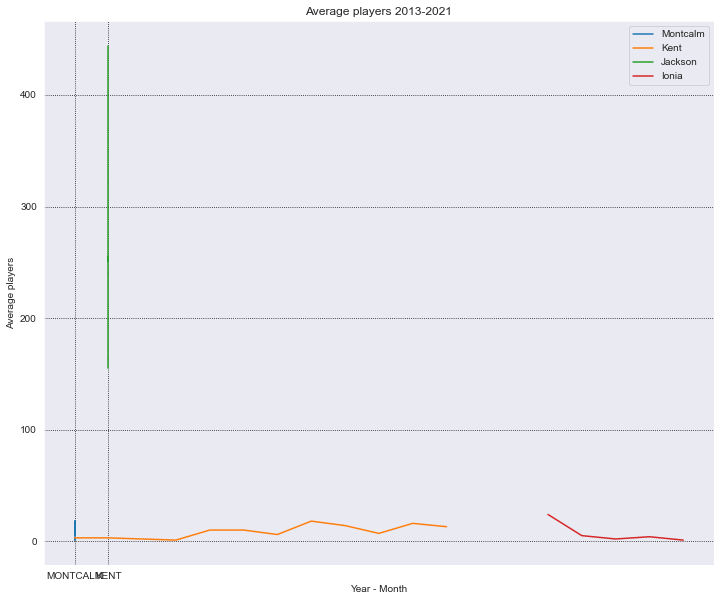

In [75]:
rcParams['figure.figsize'] = 12,10
plt.plot(Montcalm['CNTY_NAME'], Montcalm['PosTotal'], Montcalm['PosTotal'])
plt.plot(Kent['CNTY_NAME'], Kent['TestTotal'], Kent['PosTotal'])
plt.plot(Jackson['CNTY_NAME'], Jackson['TestTotal'], Jackson['PosTotal'])
plt.plot(Ionia['CNTY_NAME'], Ionia['TestTotal'], Ionia['PosTotal'])
plt.grid(True, color='k', linestyle=':')
plt.title("Average players 2013-2021")
plt.xlabel('Year - Month')
plt.ylabel('Average players')
plt.legend(['Montcalm', 'Kent', 'Jackson', 'Ionia']);
